# Object Detection using YOLO CV2

### YOLO — You Only Look Once — is an extremely fast multi object detection algorithm 
### which uses convolutional neural network (CNN) to detect and identify objects.

# Image detection

### Import Librarys and cv2 neuronal net

In [22]:
import cv2  

In [2]:
import matplotlib.pyplot as plt 

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

In [5]:
classLabels = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


### Import images

In [28]:
img = cv2.imread('transporte.jpg')

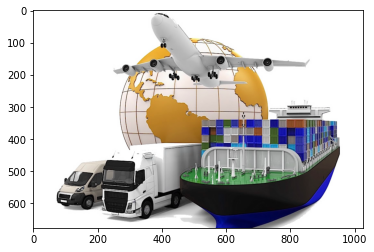

In [9]:
plt.imshow(img)

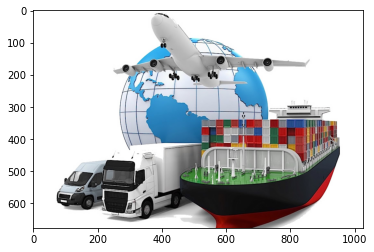

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold = 0.5)

In [12]:
print(ClassIndex) #show index labels that appears in our image

[8 5 9 5 9]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x,y), x+w, y+h),(255,0,0), 2)
    #cv2.putText(framem text, (text_offset_x,text_offset_y),font, fontScale= font_scale,color=(0,255,0),thickness=3))
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale = font_scale,color=(0,255,0),thickness=3)

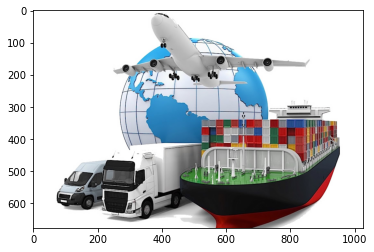

In [30]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

### CV2 model in one cell

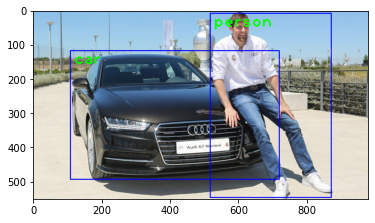

In [15]:
img2 = cv2.imread('coche1.jpeg')
ClassIndex, confidece, bbox = model.detect(img2,confThreshold = 0.5)
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x,y), x+w, y+h),(255,0,0), 2)
    #cv2.putText(framem text, (text_offset_x,text_offset_y),font, fontScale= font_scale,color=(0,255,0),thickness=3))
    cv2.rectangle(img2,boxes,(255,0,0), 2)
    cv2.putText(img2,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale = font_scale,color=(0,255,0),thickness=3)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

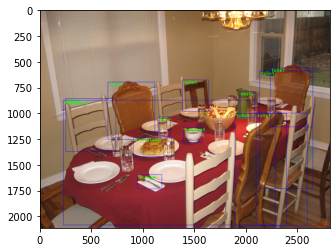

In [16]:
img3 = cv2.imread('glass.jpg')
ClassIndex, confidece, bbox = model.detect(img3,confThreshold = 0.5)
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x,y), x+w, y+h),(255,0,0), 2)
    #cv2.putText(framem text, (text_offset_x,text_offset_y),font, fontScale= font_scale,color=(0,255,0),thickness=3))
    cv2.rectangle(img3,boxes,(255,0,0), 2)
    cv2.putText(img3,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale = font_scale,color=(0,255,0),thickness=3)
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))

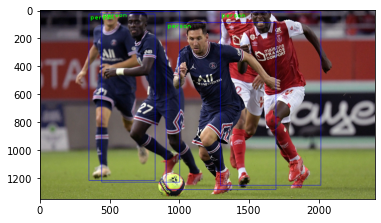

In [17]:
img = cv2.imread('mesi.jpg')
ClassIndex, confidece, bbox = model.detect(img,confThreshold = 0.6)
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x,y), x+w, y+h),(255,0,0), 2)
    #cv2.putText(framem text, (text_offset_x,text_offset_y),font, fontScale= font_scale,color=(0,255,0),thickness=3))
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale = font_scale,color=(0,255,0),thickness=3)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Video Detection 

### Output list numbers are objects detected in every frame of the video

In [32]:
cap = cv2.VideoCapture('TrafficJam.mp4' )

#check if video is opened correctly 
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold= 0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd <=80):
                cv2.rectangle(frame,boxes,(255,0,0), 2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale = font_scale,color=(0,255,0),thickness=3)
    
    cv2.imshow('Objetc Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break 
        
cap.release()
cv2.destroyAllWindows()

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[3 3]
()
()
()
()
[42]
[1]
[42  1]
()
()
()
()
[1]
()
()
()
()
()
()
()
[1 1]
[1]
[1 1]
[1 1]
[ 1 10]
[1]
[1]
[1]
[10  1]
[10  1]
[10  1  3]
[10  3  1]
[10  3 10  1]
[ 3 10]
()
[ 3 10]
()
()
[1]
()
()
()
()
()
()
()
()
[3 3]
[3 3]
[3 3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3 3 3 3]
[3]
[3 3 3]
[3 3 3 3]
[ 3  3 10]
[10  3  3]
[6 3 3 3]
[3 3 3 3 3]
[6 3 3 3 3 3]
[3 3 6]
[3 3]
[3]
[3 3 3 3]
[3 3 3]

[3 3 3]
[3 3 1]
[3 8]
[3 3 1 3]
[3 3 3 1]
[3 1 3 3 1 1 8]
[3 3 3 1 1 1]
[3 3 1]
[3 3 3 3]
[3 1 3 3]
[3 3 3 3]
[3 3 3]
[3 3 3 1]
[3 3 3 3]
[3 3 1 3 1 3 1]
[3 3 3 3 1 1 1]
[3 3 3 1 3 1 1]
[3 3 1 1 3 1 3]
[3 3 1 3 3]
[3 3 3 1 1]
[3 3 3 1 3]
[3 3 3 3 8 1 8]
[3 3 3 3]
[3 3 3 1 3]
[3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 1 3]
[3 1 3 3 3 3]
[3 3 3 1 3 3]
[3 3 3]
[3 3 3 3 8]
[3 3 8 3]
[3 3 3 3 3]
[3 3 3 8]
[3 3 3 9 3 3]
[ 3  9  3  3  3  9 28  1]
[3 3 3 9 3 9 9]
[3 3 3]
[3 3 3 3]
[3 3 3 8 5 3]
[3 3 3 3]
[3 3 3 8 3]
[3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3]
[3 3 3]
[3 3 3]
[3 3 9 3]
[3 9 3 3]
[9 3 3 1 3]
[3 3 3 3 3]
[3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 3 1]
[3 3 3 3]
[3 3 3]
[3 3 3 3]
[3 3 3 1]
[ 3 28 28]
[3 3 3]
[3 3 3]
[3 1 3]
[1]
[5 1]
[3 1 5 3]
[3 3 1 3]
[3]
[9]
[3]
[1 3 1 3]
[1 3]
[1 3 3 3]
[3 1 3 5]
[3 3 3 1]
[3]
[3 8 3]
()
()
[1 3]
()
()
()
[5]
()
()
[9]
[ 1 28]
[ 9 28]
[ 9 28]
[9]
()
[9]
[9]
[3]
[1]
()
()
()
()
()
[1 3]
[3]
[3]
[3]
[3]
()
()
()
[3]
()
[3]
[3]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
(

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [19]:
cap = cv2.VideoCapture('alonso.mp4' )

#check if video is opened correctly 
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold= 0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd <=80):
                cv2.rectangle(frame,boxes,(255,0,0), 2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale = font_scale,color=(0,255,0),thickness=3)
    
    cv2.imshow('Objetc Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break 
        
cap.release()
cv2.destroyAllWindows()

[1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1]
[1 1 1 1]
[1]
[1 1 1]
[1 1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1]
[1 1]
[1 1]
[1 1]
[1]
()
[1 1]
[1]
[1]
[1 1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1]
[1]
[1 1]
[1 1]
[1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1]
[1 1]
[1]
[1]
[1 4]
[1 4]
[1 4 4]
[1 4]
[1 4 1 3]
[1 4]
[1]
[1 3]
[1 4]
[1]
[1 4]
[1 4]
[1]
[1 4]
[1 4]
[1]
[1]
[1]
[1]
[1 4 1 4]
[1 4 1]
[1 4 1]
[1 4 1]
[1 1 1]
[1 1 1]
[1]
[1 1]
[1 1 1]
[1 1 4 1]
[1]
[1 1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1]
[1]
[1 4 1]
[1 1]
[1 4]
[1 4 1]
[1 4]
[1 4]
[1 1 4]
[4 1]
[4 1 1]
[4 1]
[4]
[4 1]
[4]
[4 1]
[4 1]
()
[4]
[4]
[4 1

[1 1 1 1 1]
[1 1 1 1]
[1 1 1 1 1 4 1]
[1 1 1 3 1 1]
[1 1 3 1 1]
[1 1 1 3 1]
[1 1 1 3]
[1 1 1]
[1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1 1 1 4 1]
[1 1 1 1 4]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1]
[1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1 1]
[1 1]
[1 1 1]
[1 1 4 1]
[1 4]
[4 4]
[1 1 1 4 4]
[1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1 1

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
